In [1]:
#Temel DataFrame İşlemleri 

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [3]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .enableHiveSupport() \
    .getOrCreate()

sc=spark.sparkContext

In [4]:
sc

<SparkContext master=local appName=pyspark_uygulama>

In [5]:
spark_df=spark.read.csv("churn.csv",header=True,inferSchema=True)

In [6]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [7]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [8]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [9]:
import seaborn as sns
df=sns.load_dataset("diamonds")

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [13]:
df.ndim #boyut sayısı

2

In [14]:
spark_df.show(3,truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [15]:
spark_df.count()

900

In [16]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [17]:
spark_df.describe()

DataFrame[summary: string, _c0: string, Names: string, Age: string, Total_Purchase: string, Account_Manager: string, Years: string, Num_Sites: string, Churn: string]

In [18]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [19]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [20]:
spark_df.select("Age","Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [21]:
spark_df.filter(spark_df.Age>40).count()

524

In [22]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [23]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [24]:
#SQL İşlemleri

In [25]:
spark_df.createOrReplaceTempView("tbl_df") #Geçici tablo oluşturduk

In [26]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [27]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   tbl_df|       true|
+---------+---------+-----------+



In [28]:
spark.sql("select Age from tbl_df").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [29]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [30]:
#Büyük Veri Görselleştirme

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sdf=spark_df.toPandas()

In [33]:
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


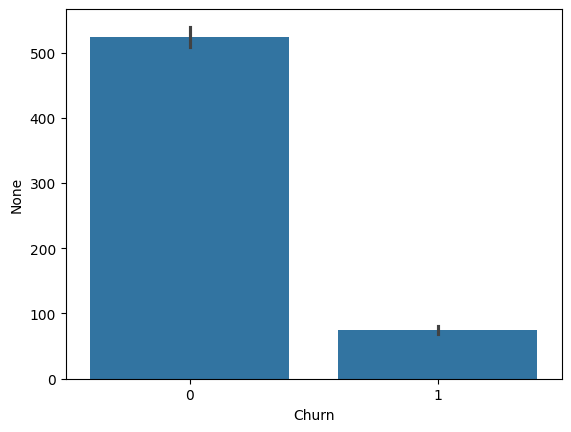

In [34]:
sns.barplot(x="Churn",y= sdf.Churn.index,data=sdf);

In [35]:
a=spark_df.groupby("Churn").count().toPandas()

In [36]:
type(a)

pandas.core.frame.DataFrame

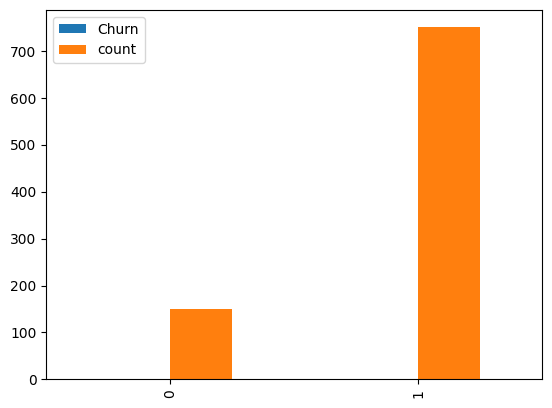

In [37]:
spark_df.groupby("Churn").count().toPandas().plot(kind="bar");

In [38]:
#büyük veride indirgemeden sonra toPandas çevirip görselleme yapabilirsin

In [39]:
sc.stop()